## Fundamental of Data Science

### Importing Modules

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Markdown, display
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

## Loading the Dataset

In [2]:
#load dataset
census_data = pd.read_csv('census11.csv')
census_data

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Regentchain Avenue,Ashleigh,Dale,41,Head,Divorced,Female,Field trials officer,None,Catholic
1,1,Regentchain Avenue,Deborah,Dale,11,Daughter,NaN,Female,Student,None,NaN
2,1,Regentchain Avenue,Gary,Dale,7,Son,NaN,Male,Student,None,NaN
3,2,Regentchain Avenue,Edward,Grant,40,Head,Married,Male,Environmental education officer,None,Methodist
4,2,Regentchain Avenue,Elizabeth,Grant,35,Wife,Married,Female,Public librarian,None,Catholic
...,...,...,...,...,...,...,...,...,...,...,...
8372,1,Howard House,Dennis,Bryant,1,Son,NaN,Male,Child,None,NaN
8373,1,Howard House,Beverley,Cox,44,Lodger,Single,Female,Building services engineer,None,None
8374,1,Howard House,Lee,Harrison,32,Lodger,Single,Male,Diplomatic Services operational officer,None,None
8375,1,Howard House,Hollie,Carroll,52,Lodger,Single,Female,Further education lecturer,None,Christian


## Info of DataFrame

In [3]:
# Checking the Data Type and Information about the Dateset
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8377 entries, 0 to 8376
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8377 non-null   int64 
 1   Street                         8377 non-null   object
 2   First Name                     8377 non-null   object
 3   Surname                        8377 non-null   object
 4   Age                            8377 non-null   object
 5   Relationship to Head of House  8377 non-null   object
 6   Marital Status                 6402 non-null   object
 7   Gender                         8377 non-null   object
 8   Occupation                     8377 non-null   object
 9   Infirmity                      8377 non-null   object
 10  Religion                       6365 non-null   object
dtypes: int64(1), object(10)
memory usage: 720.0+ KB


- From the dataset, 10 of the columns are object data types and 1 integer data type.

In [4]:
# check the dimension
census_data.shape 

(8377, 11)

- From the dataset there are 8377 rows and 11 colums in the dataset.

In [5]:
#Checking for missing value
census_data.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1975
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2012
dtype: int64

- From the dataset, Religion have the highest number of missing values with 2012 missing values and Marital Status with 1975 missing values. Note: Missing values is different from inconsistences, i.e empty string.

# Data Preprocessin
### My goal here is to handle the problems with the features in the data .

## Treating Age Colums
- First, I need to investigate the problem with the Age column
  - Which roe(s) caused the change in the data types

In [6]:
# Print out the problematic rows
for row_no, row in enumerate(census_data['Age']):
    try:
        age = float(row)

    except Exception as error:
        print(f'{error} in {row_no}')

could not convert string to float: ' ' in 4000


In [7]:
# Replace the empty string with the nan value
census_data['Age'].replace([' '], [np.nan], inplace = True)

In [8]:
# Sanity check
for row_no, row in enumerate(census_data['Age']):
    try:
        age = float(row)

    except Exception as error:
        print(f'{error} in {row_no}')

In [9]:
# conver the data type to float
census_data['Age'] = census_data['Age'].astype(float) 

In [10]:
#Checking the missing value in the Age colum
census_data['Age'].isnull().sum()

1

In [11]:
# filling the missing value
census_data['Age'].describe()

count    8376.000000
mean       36.308111
std        21.782180
min         0.000000
25%        19.000000
50%        36.000000
75%        51.000000
max       116.000000
Name: Age, dtype: float64

In [12]:
#Filling the missing value with the median value
census_data['Age'].fillna(value =census_data['Age'].median(), inplace = True)

In [13]:
#Sanity check
census_data['Age'].isnull().sum()

0

In [14]:
census_data['Age'].unique()

array([ 41.        ,  11.        ,   7.        ,  40.        ,
        35.        ,  19.        ,  17.        ,  60.        ,
        62.        ,  30.        ,  42.        ,  46.        ,
         4.        ,  78.        ,  81.        ,  43.        ,
        44.        ,  24.        ,  57.        ,  53.        ,
        32.        ,  12.        ,   9.        ,  85.        ,
        58.        ,  59.        ,  26.        ,  90.        ,
        97.        ,  63.        ,  18.        ,  15.        ,
        10.        ,  47.        ,  16.        ,  13.        ,
        36.        ,   6.        ,   2.        ,   1.        ,
        25.        ,  56.        ,  38.        ,  21.        ,
        31.        ,  74.        ,  67.        ,  65.        ,
        71.        ,  79.        ,  45.        ,  61.        ,
        72.        ,  54.        ,  33.        ,  34.        ,
        23.        ,  28.        ,  29.        ,  91.        ,
        64.        ,  80.        ,  76.        ,  49.  

<AxesSubplot: xlabel='Age'>

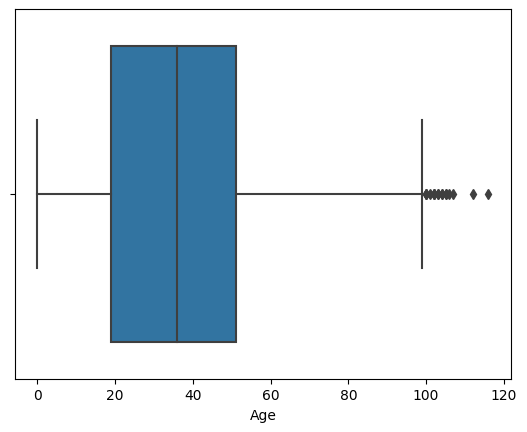

In [15]:
sns.boxplot(x = census_data.Age)

## Treating Marital Status
- Usually, we fill the missing values in categorical variables with the most common(mode) But I need the domain Knowledge careful investigation.

In [16]:
#Check the unique value
census_data['Marital Status'].unique()

array(['Divorced', nan, 'Married', 'Single', 'Widowed', ' '], dtype=object)

In [17]:
# Replace the empty string with na value
census_data['Marital Status'].replace([' '], np.nan, inplace = True)

In [18]:
# check the unique marital status
census_data['Marital Status'].value_counts()

Single      2999
Married     2224
Divorced     791
Widowed      387
Name: Marital Status, dtype: int64

In [19]:
m=census_data["Marital Status"]
census_data[m.isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,1,Regentchain Avenue,Deborah,Dale,11.0,Daughter,NaN,Female,Student,None,NaN
2,1,Regentchain Avenue,Gary,Dale,7.0,Son,NaN,Male,Student,None,NaN
6,2,Regentchain Avenue,Mandy,Grant,17.0,Daughter,NaN,Female,Student,None,NaN
7,2,Regentchain Avenue,Amanda,Grant,11.0,Daughter,NaN,Female,Student,None,NaN
14,4,Regentchain Avenue,Sandra,Price,4.0,Daughter,NaN,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8352,1,Oyster Manorhouse,Howard,Goodwin,17.0,Son,NaN,Male,Student,None,NaN
8369,1,Howard House,Tom,Bryant,13.0,Son,NaN,Male,Student,None,NaN
8370,1,Howard House,Jean,Bryant,8.0,Daughter,NaN,Female,Student,None,NaN
8371,1,Howard House,Abbie,Bryant,4.0,Daughter,NaN,Female,Child,None,NaN


In [20]:
# check for people that are less than 18 year are marital staus are null
census_data[(census_data['Age']< 18) & (census_data['Marital Status'].isnull())]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,1,Regentchain Avenue,Deborah,Dale,11.0,Daughter,NaN,Female,Student,None,NaN
2,1,Regentchain Avenue,Gary,Dale,7.0,Son,NaN,Male,Student,None,NaN
6,2,Regentchain Avenue,Mandy,Grant,17.0,Daughter,NaN,Female,Student,None,NaN
7,2,Regentchain Avenue,Amanda,Grant,11.0,Daughter,NaN,Female,Student,None,NaN
14,4,Regentchain Avenue,Sandra,Price,4.0,Daughter,NaN,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8352,1,Oyster Manorhouse,Howard,Goodwin,17.0,Son,NaN,Male,Student,None,NaN
8369,1,Howard House,Tom,Bryant,13.0,Son,NaN,Male,Student,None,NaN
8370,1,Howard House,Jean,Bryant,8.0,Daughter,NaN,Female,Student,None,NaN
8371,1,Howard House,Abbie,Bryant,4.0,Daughter,NaN,Female,Child,None,NaN


In [21]:
# Replace all the people that are less than or equal 18 year which there marital status is null with single

census_data.loc[(census_data['Age'] < 18) & (census_data['Marital Status'].isnull()),:] = census_data.loc[(census_data['Age'] < 18) & (census_data['Marital Status'].isnull()),:].fillna(value = {'Marital Status': 'Single'})

- I replace those that are less than 18 years with single 

In [22]:
census_data[census_data['Marital Status'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4230,47,Chan Estate,Norman,Ward,25.0,Son,NaN,Male,Administrator,None,None


In [23]:
# check with the people living in house number 47
census_data[(census_data['House Number'] == 47) & (census_data['Street'] == 'Chan Estate') & (census_data['Surname'] == 'Ward')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4228,47,Chan Estate,Jemma,Ward,41.0,Head,Married,Female,Unemployed,None,Christian
4229,47,Chan Estate,Maurice,Ward,44.0,Husband,Married,Male,Unemployed,None,Christian
4230,47,Chan Estate,Norman,Ward,25.0,Son,NaN,Male,Administrator,None,None
4231,47,Chan Estate,Ronald,Ward,12.0,Son,Single,Male,Student,None,NaN


In [24]:
census_data['Marital Status'].fillna('Single', inplace = True)

- After checking the people living in house number 47 i find out that the person with NaN is of age of 25 and i can't say is married or Divorced because he is still living with his parent, i therfore fill it with single.

## Treating Gender Column

In [25]:
#Check for the unique value
census_data['Gender'].unique()

array(['Female', 'Male', ' '], dtype=object)

In [26]:
# Replace the empty string with NaN
census_data['Gender'].replace([' '], np.nan, inplace = True)

In [27]:
#Check for row with missing values

census_data[census_data['Gender'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1002,1,Taylor Grove,Pamela,Edwards,69.0,Head,Married,NaN,"Retired Engineer, technical sales",None,Christian
6899,8,Tiger Avenue,Leanne,Gill,22.0,None,Single,NaN,University Student,None,None
7348,25,Canterbury Well,Irene,Harvey,51.0,Head,Married,NaN,"Librarian, public",None,Christian


In [28]:
census_data.loc[[1002, 6899, 7348], 'Gender'] = ['Female', 'Male', 'Female']

- i replace their gender using their first name

### Treating the Occupation

In [29]:
# check for the unique occupation

census_data['Occupation'].unique()

array(['Field trials officer', 'Student',
       'Environmental education officer', ...,
       'Retired Building services engineer', 'Retired Legal executive',
       'Retired Counsellor'], dtype=object)

In [30]:
# Replacing all the occupation that start with 'Retired at the beggining of their Occupating '
census_data.loc[census_data['Occupation'].str.startswith('Retired'), 'Occupation'] = 'Retired'

In [31]:
census_data[census_data['Occupation'].str.startswith('Retired')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
15,5,Regentchain Avenue,Danielle,Dean,78.0,Head,Married,Female,Retired,None,None
16,5,Regentchain Avenue,Robert,Dean,81.0,Husband,Married,Male,Retired,None,None
29,8,Regentchain Avenue,Leon,Duncan,85.0,Head,Widowed,Male,Retired,None,Christian
34,2,Telegraphnet Street,Leah,Taylor,90.0,Head,Married,Female,Retired,None,Catholic
35,2,Telegraphnet Street,Craig,Taylor,97.0,Husband,Married,Male,Retired,None,Catholic
...,...,...,...,...,...,...,...,...,...,...,...
8231,41,Arnold Ways,Francis,Moore,79.0,Head,Married,Male,Retired,None,Christian
8232,41,Arnold Ways,Jodie,Moore,80.0,Wife,Married,Female,Retired,None,Christian
8236,45,Arnold Ways,Margaret,James,70.0,Head,Married,Female,Retired,None,Christian
8241,47,Arnold Ways,Maurice,Hughes,80.0,Head,Divorced,Male,Retired,None,Christian


In [32]:
# replace thoes with leess than 18 years of with Student in their occupation
census_data[(census_data['Age']<18) & (census_data['Occupation'] == 'Student')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,1,Regentchain Avenue,Deborah,Dale,11.0,Daughter,Single,Female,Student,None,NaN
2,1,Regentchain Avenue,Gary,Dale,7.0,Son,Single,Male,Student,None,NaN
6,2,Regentchain Avenue,Mandy,Grant,17.0,Daughter,Single,Female,Student,None,NaN
7,2,Regentchain Avenue,Amanda,Grant,11.0,Daughter,Single,Female,Student,None,NaN
27,7,Regentchain Avenue,Leon,Webster,12.0,Son,Single,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8332,1,Aries Spire,Sean,Henderson,7.0,Son,Single,Male,Student,None,NaN
8333,1,Aries Spire,Diana,Henderson,6.0,Daughter,Single,Female,Student,None,NaN
8352,1,Oyster Manorhouse,Howard,Goodwin,17.0,Son,Single,Male,Student,None,NaN
8369,1,Howard House,Tom,Bryant,13.0,Son,Single,Male,Student,None,NaN


In [33]:
# correct  inconsistent occupation
census_data[(census_data['Age'] > 18) & (census_data['Occupation'] == 'University Student')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5,2,Regentchain Avenue,Catherine,Grant,19.0,Daughter,Single,Female,University Student,None,None
13,4,Regentchain Avenue,Ashley,Price,19.0,Son,Single,Male,University Student,None,None
24,6,Regentchain Avenue,Donald,Cooper,19.0,None,Single,Male,University Student,None,Catholic
64,10,Telegraphnet Street,Joyce,Smith,21.0,Head,Single,Female,University Student,None,None
88,22,Telegraphnet Street,Duncan,Shaw,19.0,None,Single,Male,University Student,None,Catholic
...,...,...,...,...,...,...,...,...,...,...,...
8298,1,Thames Villa,Diana,Wood,21.0,Daughter,Single,Female,University Student,None,None
8299,1,Thames Villa,Reece,Wood,20.0,Son,Single,Male,University Student,None,None
8313,1,Thames Villa,Leslie,Quinn,21.0,Lodger,Single,Male,University Student,None,None
8338,1,Aries Spire,Aimee,Dawson,20.0,Lodger,Single,Female,University Student,None,Methodist


### Treting Religion

In [34]:
# Check the unique value for religion

census_data['Religion'].unique()

array(['Catholic', nan, 'Methodist', 'None', 'Christian', 'Jewish',
       'Sikh', 'Muslim', 'Buddist', 'Quaker', 'Housekeeper', 'Jedi',
       'Pagan', ' ', 'Private', 'Orthodoxy'], dtype=object)

In [35]:
# check for row with empty string in Religion

census_data[census_data['Religion'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4288,12,Jones Ramp,Jane,Armstrong,46.0,Wife,Married,Female,Garment/textile technologist,None,
7487,58,Canterbury Well,Christopher,Cole,15.0,Son,Single,Male,Student,None,


- There are two empty string in the Religion Column

In [36]:
# I exploy the house number and Surname 
census_data[(census_data['House Number'] == 12) & (census_data['Surname'] == 'Armstrong')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4287,12,Jones Ramp,Sam,Armstrong,49.0,Head,Married,Male,"Accountant, chartered certified",None,Catholic
4288,12,Jones Ramp,Jane,Armstrong,46.0,Wife,Married,Female,Garment/textile technologist,None,


In [37]:
census_data.loc[[4288], 'Religion'] = ['Catholic']

- After checking the House number with respect to the Surname, i find out that the head of the house is catholic and i change the Empty string to Catholic.

In [38]:
# I exploy the house number and Surname 
census_data[(census_data['House Number'] == 58) & (census_data['Surname'] == 'Cole')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7482,58,Canterbury Well,Daniel,Cole,62.0,Head,Single,Male,Water quality scientist,None,Methodist
7484,58,Canterbury Well,Donna,Cole,25.0,Daughter,Single,Female,Maintenance engineer,None,None
7485,58,Canterbury Well,Deborah,Cole,21.0,Daughter,Single,Female,University Student,None,Methodist
7486,58,Canterbury Well,Gerard,Cole,19.0,Son,Single,Male,University Student,None,None
7487,58,Canterbury Well,Christopher,Cole,15.0,Son,Single,Male,Student,None,


In [39]:
census_data.loc[[7487], 'Religion'] = ['Methodist']

- After checking the House number with respect to the Surname, i find out that the head of the house is Methodist and i change the second empty sting to Methodist since she is just 15 years of Age.

In [40]:
# Check for the missing values
census_data[census_data['Religion'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,1,Regentchain Avenue,Deborah,Dale,11.0,Daughter,Single,Female,Student,None,NaN
2,1,Regentchain Avenue,Gary,Dale,7.0,Son,Single,Male,Student,None,NaN
6,2,Regentchain Avenue,Mandy,Grant,17.0,Daughter,Single,Female,Student,None,NaN
7,2,Regentchain Avenue,Amanda,Grant,11.0,Daughter,Single,Female,Student,None,NaN
14,4,Regentchain Avenue,Sandra,Price,4.0,Daughter,Single,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8352,1,Oyster Manorhouse,Howard,Goodwin,17.0,Son,Single,Male,Student,None,NaN
8369,1,Howard House,Tom,Bryant,13.0,Son,Single,Male,Student,None,NaN
8370,1,Howard House,Jean,Bryant,8.0,Daughter,Single,Female,Student,None,NaN
8371,1,Howard House,Abbie,Bryant,4.0,Daughter,Single,Female,Child,None,NaN


In [41]:
# check for people that are less than 18 year are religion are null
census_data[(census_data['Age']<= 18) & (census_data['Religion'].isnull())]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,1,Regentchain Avenue,Deborah,Dale,11.0,Daughter,Single,Female,Student,None,NaN
2,1,Regentchain Avenue,Gary,Dale,7.0,Son,Single,Male,Student,None,NaN
6,2,Regentchain Avenue,Mandy,Grant,17.0,Daughter,Single,Female,Student,None,NaN
7,2,Regentchain Avenue,Amanda,Grant,11.0,Daughter,Single,Female,Student,None,NaN
14,4,Regentchain Avenue,Sandra,Price,4.0,Daughter,Single,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8352,1,Oyster Manorhouse,Howard,Goodwin,17.0,Son,Single,Male,Student,None,NaN
8369,1,Howard House,Tom,Bryant,13.0,Son,Single,Male,Student,None,NaN
8370,1,Howard House,Jean,Bryant,8.0,Daughter,Single,Female,Student,None,NaN
8371,1,Howard House,Abbie,Bryant,4.0,Daughter,Single,Female,Child,None,NaN


In [42]:
# Sanity check

census_data['Religion'].unique()

array(['Catholic', nan, 'Methodist', 'None', 'Christian', 'Jewish',
       'Sikh', 'Muslim', 'Buddist', 'Quaker', 'Housekeeper', 'Jedi',
       'Pagan', 'Private', 'Orthodoxy'], dtype=object)

In [43]:
# Replace all the people that are less than or equal 18 year which there Religion is null with None

census_data.loc[(census_data['Age'] <= 18) & (census_data['Religion'].isnull()),:] = census_data.loc[(census_data['Age'] <= 18) & (census_data['Religion'].isnull()),:].fillna(value = {'Religion': 'None'})

In [44]:
#Sanity check for Null
census_data[(census_data['Age']< 18) & (census_data['Religion'].isnull())]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [45]:
census_data[census_data['Religion'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3911,27,Capricorn Throughway,Declan,Stewart,30.0,Head,Single,Male,PhD Student,None,NaN
4920,11,Arrows Mission,Justin,Smith,19.0,Husband,Married,Male,University Student,None,NaN
5028,15,Bryan Road,Ruth,Wilkinson,19.0,Wife,Married,Female,University Student,None,NaN
7638,11,Aethelred Heights,Simon,Price,22.0,Partner,Single,Male,University Student,None,NaN
7669,20,Aethelred Heights,Dylan,Shaw,19.0,Head,Single,Male,University Student,None,NaN


In [46]:
census_data.loc[(census_data['Age'] > 18) & (census_data['Religion'].isnull()),:] = census_data.loc[(census_data['Age'] > 18) & (census_data['Religion'].isnull()),:].fillna(value = {'Religion': 'None'})

In [47]:
census_data['Religion'].isnull().sum()

0

In [48]:
census_data.isnull().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

# Data Visualizatio
- The goal of data visualization is to extract insights from the clean data.
- The insights can be used to fomulate policies that would improve the Town
## Import the required Libraries For the Visualization

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [50]:
census_data

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Regentchain Avenue,Ashleigh,Dale,41.0,Head,Divorced,Female,Field trials officer,None,Catholic
1,1,Regentchain Avenue,Deborah,Dale,11.0,Daughter,Single,Female,Student,None,None
2,1,Regentchain Avenue,Gary,Dale,7.0,Son,Single,Male,Student,None,None
3,2,Regentchain Avenue,Edward,Grant,40.0,Head,Married,Male,Environmental education officer,None,Methodist
4,2,Regentchain Avenue,Elizabeth,Grant,35.0,Wife,Married,Female,Public librarian,None,Catholic
...,...,...,...,...,...,...,...,...,...,...,...
8372,1,Howard House,Dennis,Bryant,1.0,Son,Single,Male,Child,None,None
8373,1,Howard House,Beverley,Cox,44.0,Lodger,Single,Female,Building services engineer,None,None
8374,1,Howard House,Lee,Harrison,32.0,Lodger,Single,Male,Diplomatic Services operational officer,None,None
8375,1,Howard House,Hollie,Carroll,52.0,Lodger,Single,Female,Further education lecturer,None,Christian


## Univariableivirate Analysis
- The goalis to understand the distribution of single variable.
- These is where i focus on the effect a variable may have on a target variable.
### Histogram
- Histogram is used to visualize a single quantitative variable E.g Age, and duration

## The function below is for Numeric

In [51]:
# Defining the function for creating boxplot and hisogram 
def histogram_boxplot(data, feature, figsize=(9, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple")  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

In [52]:
census_data.describe().T

,count,mean,std,min,25%,50%,75%,max
House Number,8377.0,31.171899,34.238831,1.0,9.0,20.0,40.0,197.0
Age,8377.0,36.308075,21.780880,0.0,19.0,36.0,51.0,116.0


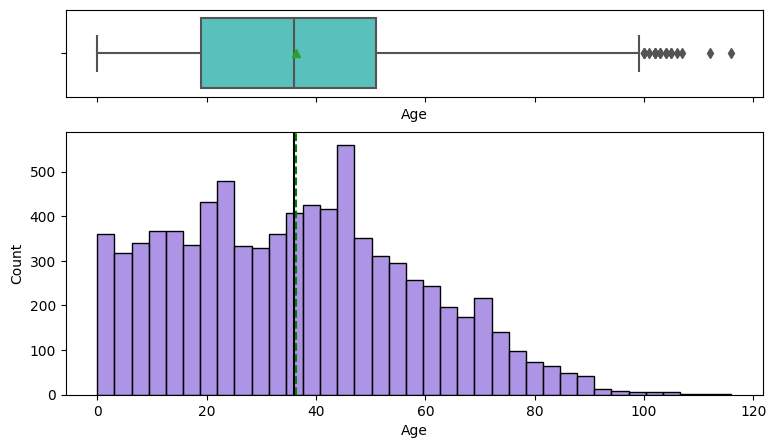

In [53]:
# Distribution of Age 

histogram_boxplot(data = census_data, feature = 'Age')

- The mean is a little bite right sekwen or it is a normal distributed

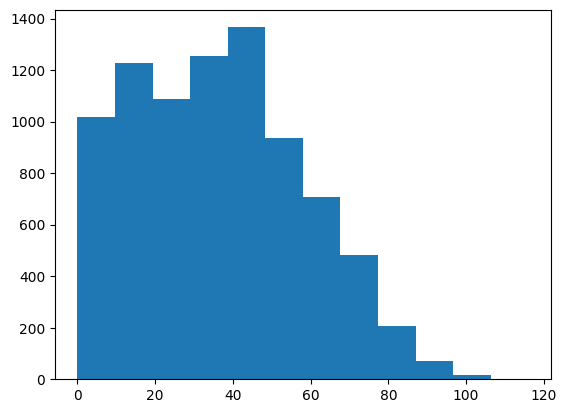

**Number of Bins  : 12**

**Bin Width : 10**

In [54]:
x = census_data["Age"]
plt.hist(x, bins=12)
plt.show()

display(Markdown(f'**Number of Bins  : {12}**'))
display(Markdown(f'**Bin Width : {round((max(x)- min(x))/12)}**'))

## More detail than just the overall age. Make two further histograms; one for “male” and one for “female” ages

## Male Age

**Number of Bins  : 12**

**Bin Width : 10**

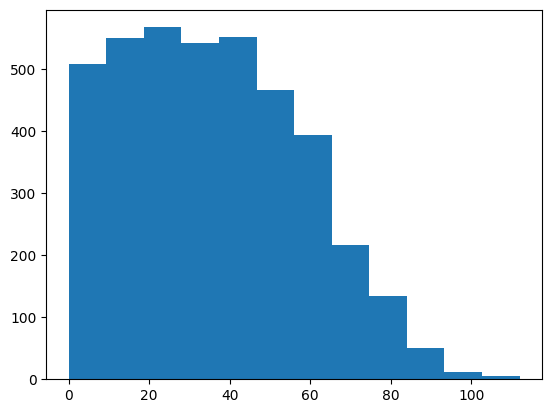

In [55]:
x1 = census_data["Age"].where(census_data["Gender"]=='Male')
plt.hist(x1, bins=12);


display(Markdown(f'**Number of Bins  : {12}**'))
display(Markdown(f'**Bin Width : {round((max(x)- min(x))/12)}**'))

## Female Age

**Number of Bins  : 12**

**Bin Width : 10**

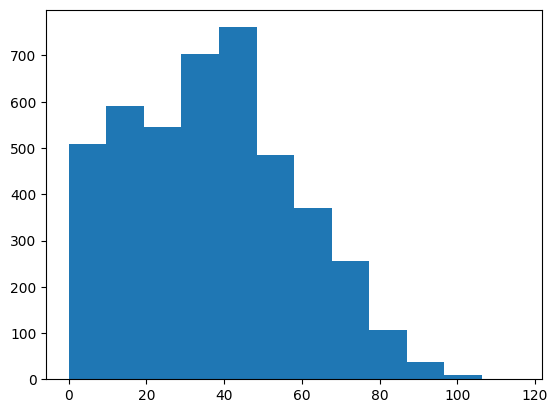

In [56]:
x2 = census_data["Age"].where(census_data["Gender"]=='Female')
plt.hist(x2, bins=12);


display(Markdown(f'**Number of Bins  : {12}**'))
display(Markdown(f'**Bin Width : {round((max(x)- min(x))/12)}**'))

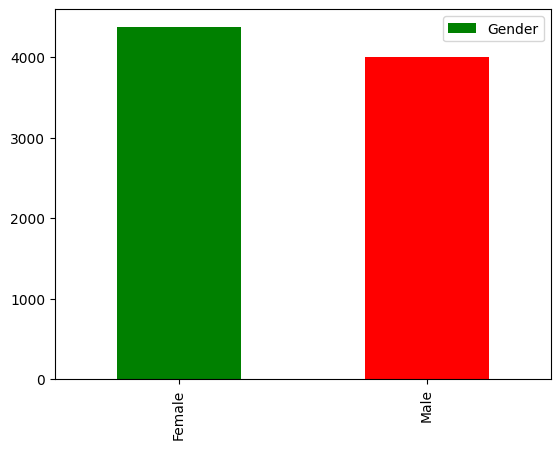

In [57]:
colors = ["green", "red"]
census_data["Gender"].value_counts().plot.bar(color = colors, legend = True);
plt.legend();


### The function below is for Categorical Variable

In [58]:
 # function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

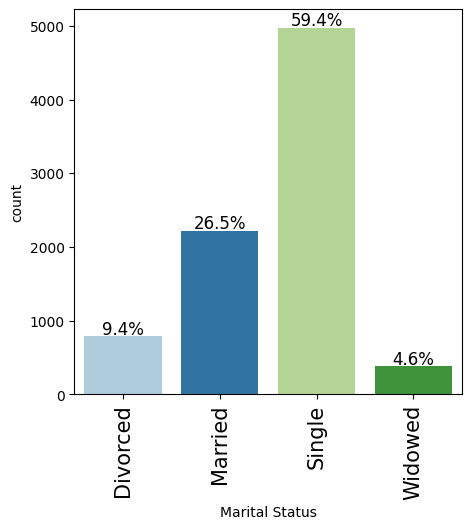

In [59]:
# Plot of Marital Status

labeled_barplot(data = census_data, feature = 'Marital Status', perc = True )


- The Plot above show that 59.4% people in the dataset were single, follow by married with 26.5%, while Divorced is 9.4%, and Widowed is 4.5%.

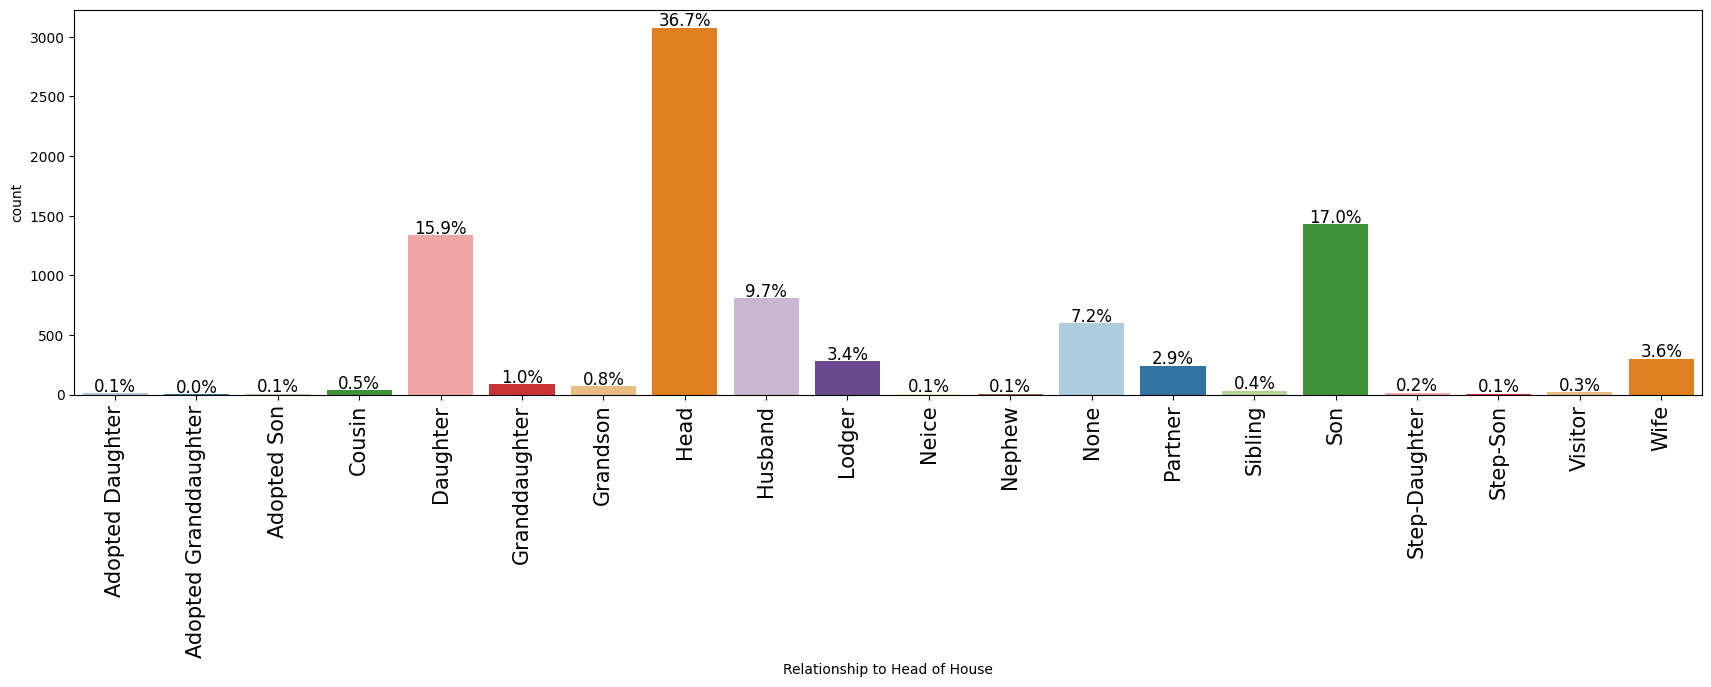

In [60]:
labeled_barplot(data = census_data, feature = 'Relationship to Head of House', perc = True )

- From the distribution above Head have the higest percentage of 36.7%, follow by Son with 17.0%, Daughter with 15.9%, Husband with 9.7% and The rest are below 8%

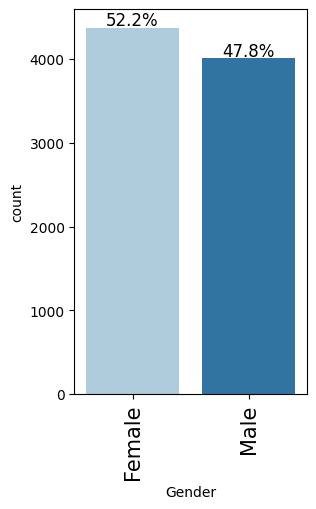

In [61]:
# Plot of Gender

labeled_barplot(data = census_data, feature = 'Gender', perc = True )

- From the plot show above, There are more female in the dataset with 52.2%, while male is 47.8%

In [62]:
census_data['Occupation'].value_counts(ascending = False)

Student                            1584
Retired                             749
University Student                  533
Unemployed                          529
Child                               473
                                   ... 
Herpetologist                         2
                                      1
Commercial/residential surveyor       1
Optometrist                           1
Technical brewer                      1
Name: Occupation, Length: 646, dtype: int64

- From the dataset people with less than 18 years have the highest number of student, follow by Retired with 749 people, University student have 533, also unemployed is 529

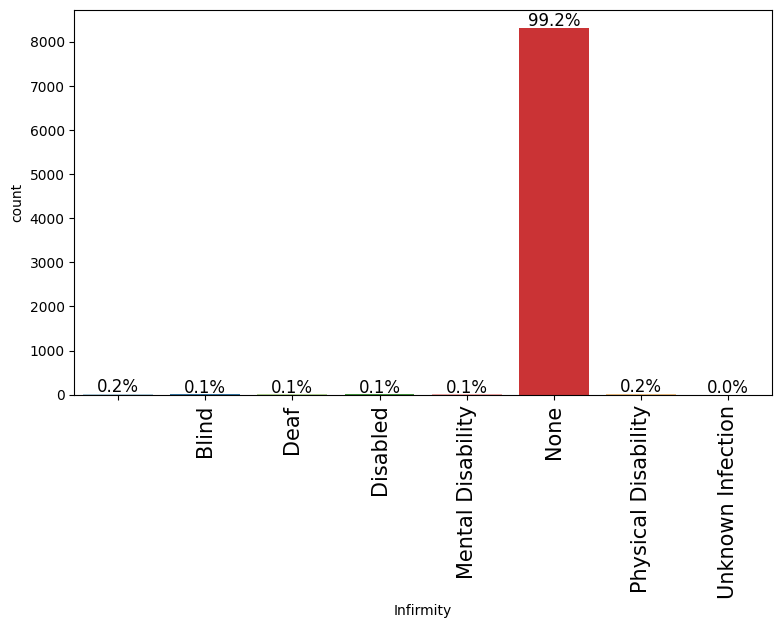

In [63]:
# Plot of Infirmity

labeled_barplot(data = census_data, feature = 'Infirmity', perc = True )

- From the dataset, above 99% have no infirmity

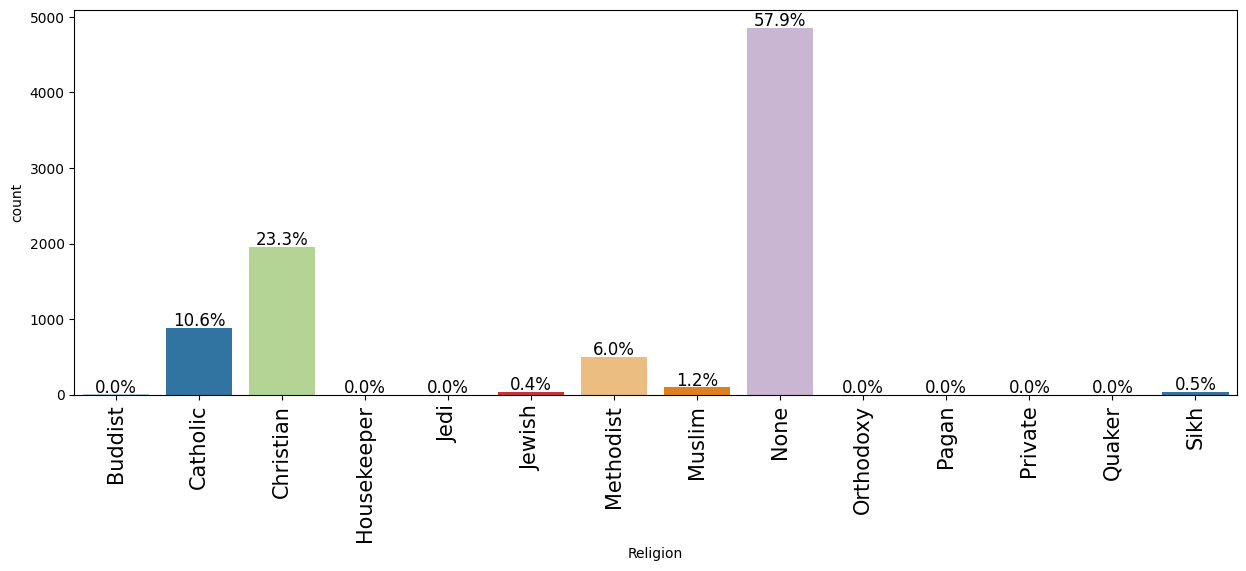

In [64]:
# Plot of Religion

labeled_barplot(data = census_data, feature = 'Religion', perc = True )

- Among those that indicate their religion, Christian have the highest follow by Catholic and Methodis

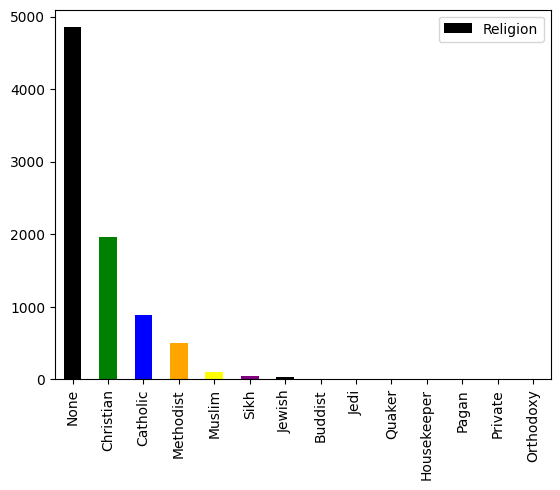

In [65]:
colors = ["black", "green", "blue", "orange", "yellow", "purple"]
census_data["Religion"].value_counts().plot.bar(color = colors, legend = True);
plt.legend();

## Bivariate Analysis

In [66]:
census_data.columns

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

<Figure size 1000x500 with 0 Axes>

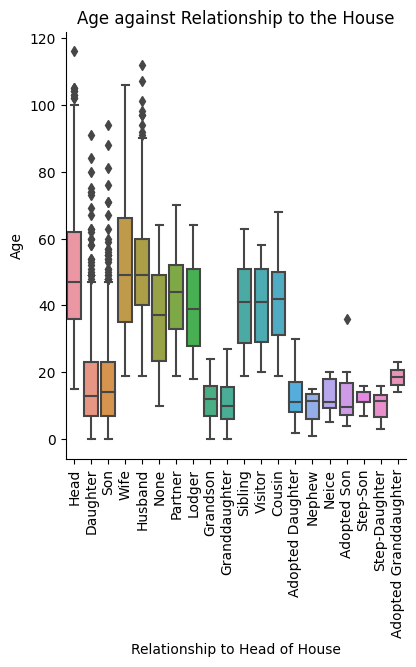

In [67]:
# Relationship between Age and Relationship to Head of House
plt.figure(figsize = (10, 5))
sns.catplot(x = 'Relationship to Head of House', y = 'Age', data = census_data, kind = 'box')
plt.title('Age against Relationship to the House')
plt.xticks(rotation = 90);

## Ages against Gender

<Figure size 1000x500 with 0 Axes>

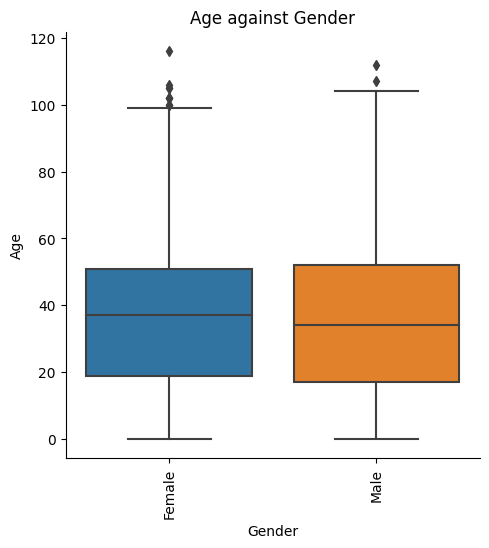

In [68]:
# Age Against Gender
plt.figure(figsize = (10, 5))
sns.catplot(x = 'Gender', y = 'Age', data = census_data, kind = 'box')
plt.title('Age against Gender')
plt.xticks(rotation = 90);

In [69]:
M = []
F = []

for i in range(0, 110, 10):
    M_count = ((census_data[(census_data['Gender'] == 'Male') & (census_data['Age'] >= i) & (census_data['Age'] < (i + 10))]).dropna()).shape[0]
    M.append(-M_count)

    F_count = ((census_data[(census_data['Gender'] == 'Female') & (census_data['Age'] >= i) & (census_data['Age'] < (i + 10))]).dropna()).shape[0]
    F.append(F_count)

Age_Class = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100+']

M.reverse()
F.reverse()
Age_Class.reverse()

print(f'Female : {F}')
print(f'Male   : {M}')
print(f'Age    : {Age_Class}')


Female : [8, 14, 106, 222, 344, 510, 739, 728, 602, 591, 508]
Male   : [-7, -16, -92, -198, -325, -477, -594, -550, -600, -635, -509]
Age    : ['100+', '90-100', '80-90', '70-80', '60-70', '50-60', '40-50', '30-40', '20-30', '10-20', '0-10']


In [70]:
final = pd.DataFrame([Age_Class,M,F])
final = final.transpose()
final.columns = ['Age','Male','Female']

final

,Age,Male,Female
0,100+,-7,8
1,90-100,-16,14
2,80-90,-92,106
3,70-80,-198,222
4,60-70,-325,344
5,50-60,-477,510
6,40-50,-594,739
7,30-40,-550,728
8,20-30,-600,602
9,10-20,-635,591


[Text(0.5, 0, 'Population_Count'), Text(0, 0.5, 'Age Group')]

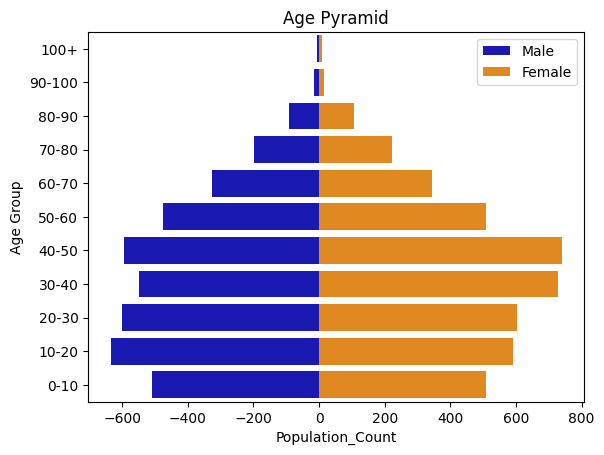

In [71]:
age_pyramid = sns.barplot(x='Male', y='Age', data=final, order=Age_Class, color=('mediumblue'), label='Male')
age_pyramid = sns.barplot(x='Female', y='Age', data=final, order=Age_Class,
color=('darkorange'), label='Female')
age_pyramid.legend()
plt.title('Age Pyramid')

age_pyramid.set(xlabel='Population_Count', ylabel='Age Group')

In [72]:
Male = []
Female = []

for i in range(0, 110, 10):
    Male_count = ((census_data[(census_data['Gender'] == 'Male') & (census_data['Age'] >= i) & (census_data['Age'] < (i + 10))])['Age'].count())
    Male.append(-Male_count)

    Female_count = ((census_data[(census_data['Gender'] == 'Female') & (census_data['Age'] >= i) & (census_data['Age'] < (i + 10))])['Age'].count())
    Female.append(Female_count)

AgeClass = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100+']

Male.reverse()
Female.reverse()
AgeClass.reverse()

print(f'Female : {Female}')
print(f'Male   : {Male}')
print(f'Age    : {AgeClass}')


Female : [8, 14, 106, 222, 344, 510, 739, 728, 602, 591, 508]
Male   : [-7, -16, -92, -198, -325, -477, -594, -550, -600, -635, -509]
Age    : ['100+', '90-100', '80-90', '70-80', '60-70', '50-60', '40-50', '30-40', '20-30', '10-20', '0-10']


In [73]:
final = pd.DataFrame([AgeClass,Male,Female])
final = final.transpose()
final.columns = ['Age','Male','Female']

final

,Age,Male,Female
0,100+,-7,8
1,90-100,-16,14
2,80-90,-92,106
3,70-80,-198,222
4,60-70,-325,344
5,50-60,-477,510
6,40-50,-594,739
7,30-40,-550,728
8,20-30,-600,602
9,10-20,-635,591


[Text(0.5, 0, 'Population_Count'), Text(0, 0.5, 'Age Group')]

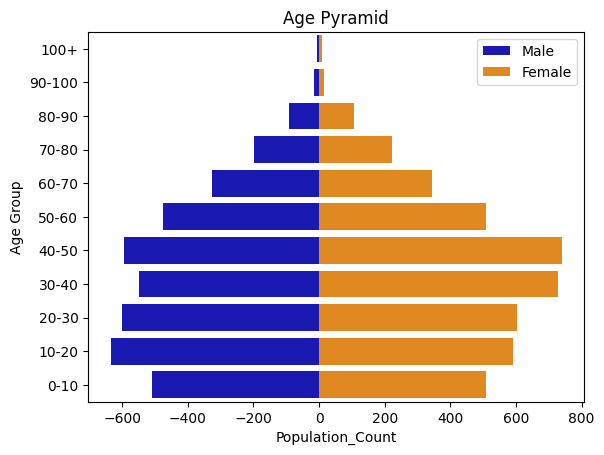

In [74]:
age_pyramid = sns.barplot(x='Male', y='Age', data=final, order=AgeClass, color=('mediumblue'), label='Male')
age_pyramid = sns.barplot(x='Female', y='Age', data=final, order=AgeClass,
color=('darkorange'), label='Female')
age_pyramid.legend()
plt.title('Age Pyramid')

age_pyramid.set(xlabel='Population_Count', ylabel='Age Group')


Text(0.5, 1.0, 'Age Pyramid')

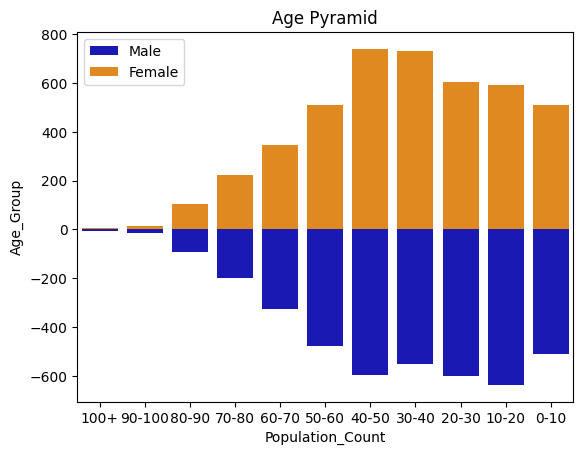

In [75]:
age_pyramid = sns.barplot(x='Age', y='Male', data=final, order=Age_Class, color='mediumblue', label='Male')
sns.barplot(x='Age', y='Female', data=final, order=Age_Class, color='darkorange', label='Female')
age_pyramid.set(xlabel='Population_Count', ylabel='Age_Group')
age_pyramid.legend()
plt.title('Age Pyramid')

## Employment/Unemployment trend

In [76]:
print(f"The Proportion of Unemployed is {(census_data.Occupation == 'Unemployed').sum() / census_data.shape[0] * 100:.2f}%")

The Proportion of Unemployed is 6.31%


In [77]:
other_occupation = census_data.Occupation.unique().tolist()
other_occupation.remove('Unemployed')

employment_status = census_data.Occupation.replace(other_occupation, 'Employed')
employment_status.value_counts(normalize=True)

Employed      0.936851
Unemployed    0.063149
Name: Occupation, dtype: float64

<AxesSubplot: xlabel='Age', ylabel='Count'>

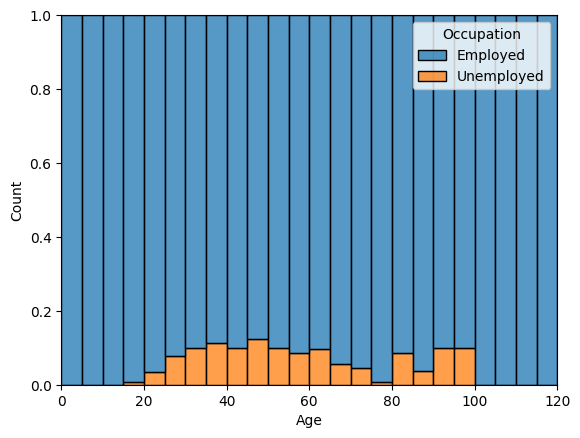

In [78]:
age = census_data.Age
# age = pd.cut(age, cat)
sns.histplot(x = age, binwidth = 5, hue = employment_status, multiple = 'fill')


- The proportion show that younger people that are employed is relatively high, an indication that unemployment is likely on the rise.

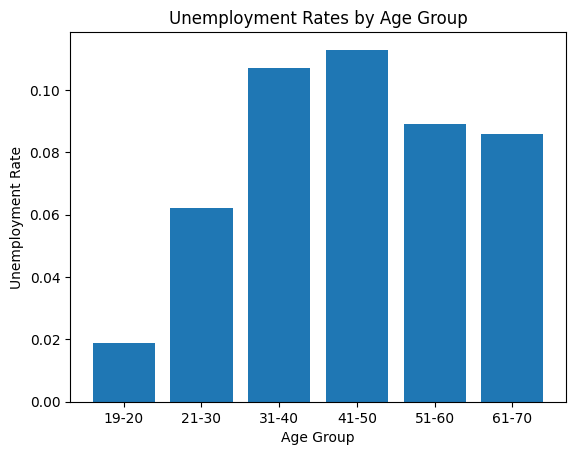

In [79]:
# Define a list of age ranges to calculate the unemployment rates for
age_ranges = [(19, 20), (21, 30), (31, 40), (41, 50), (51, 60), (61, 70)]

# Create an empty list to store the unemployment rates for each age range
unemployment_rates = []

# Calculate the unemployment rate for each age range and append it to the unemployment_rates list
for age_range in age_ranges:
    # Unpack the minimum and maximum age values from the age_range tuple
    min_age, max_age = age_range
    
    # Filter the DataFrame to include only individuals in the desired age group
    age_group_df = census_data[(census_data['Age'] >= min_age) & (census_data['Age'] < max_age)]
    
    # Filter the age_group_df to include only individuals who are unemployed
    unemployed_df = age_group_df[age_group_df['Occupation'] == 'Unemployed']
    
    # Calculate the unemployment rate as the number of unemployed individuals divided by the total number of individuals in the age group
    unemployment_rate = len(unemployed_df) / len(age_group_df)
    
    # Append the unemployment rate to the unemployment_rates list
    unemployment_rates.append(unemployment_rate)

# Define the x-axis labels as the age ranges
x_labels = [f"{min_age}-{max_age}" for (min_age, max_age) in age_ranges]

# Create a bar chart to visualize the unemployment rates for each age range
plt.bar(x_labels, unemployment_rates)

# Set the title and axis labels
plt.title("Unemployment Rates by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Unemployment Rate");


### Religion

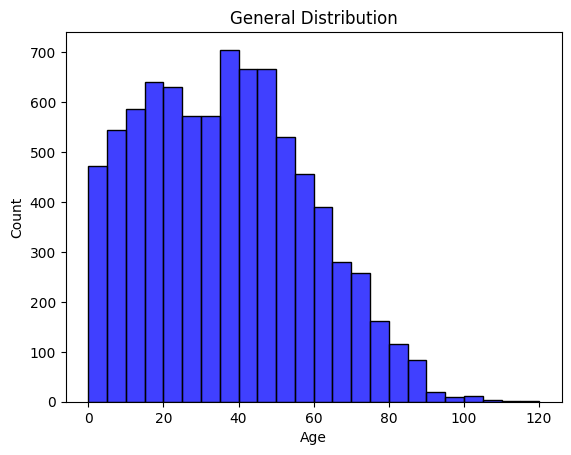

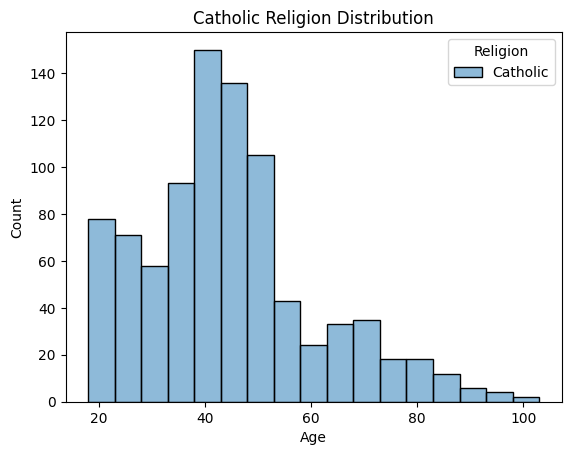

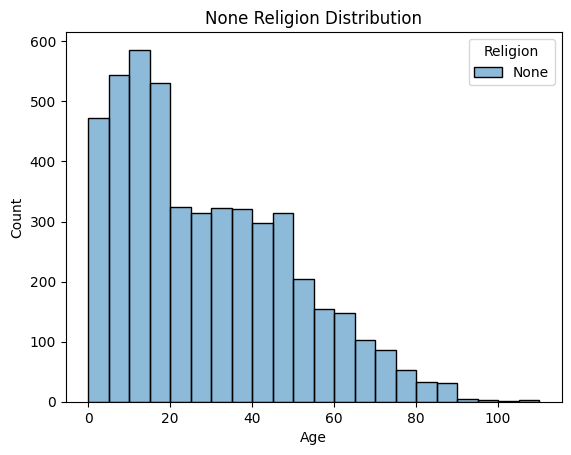

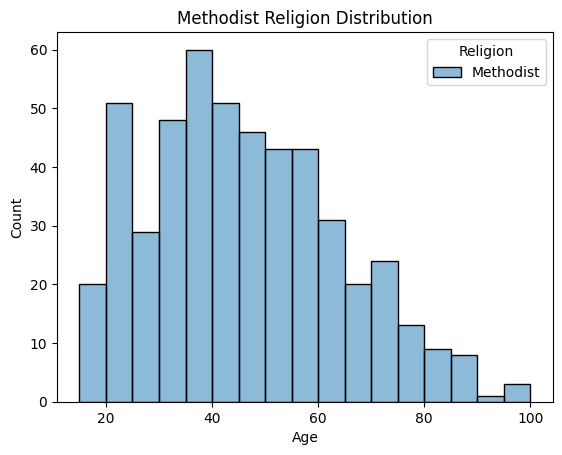

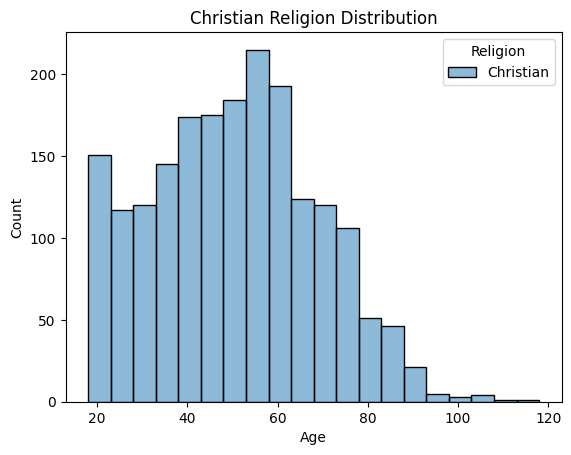

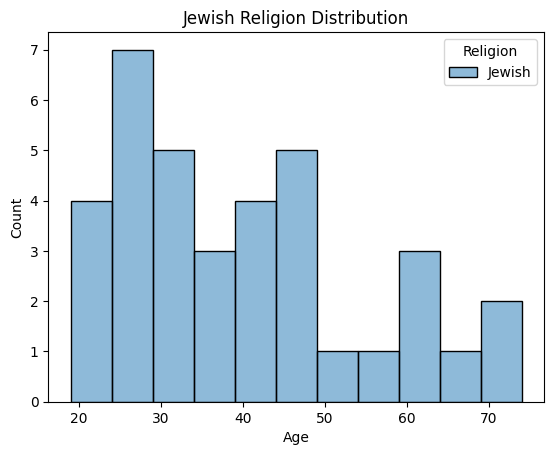

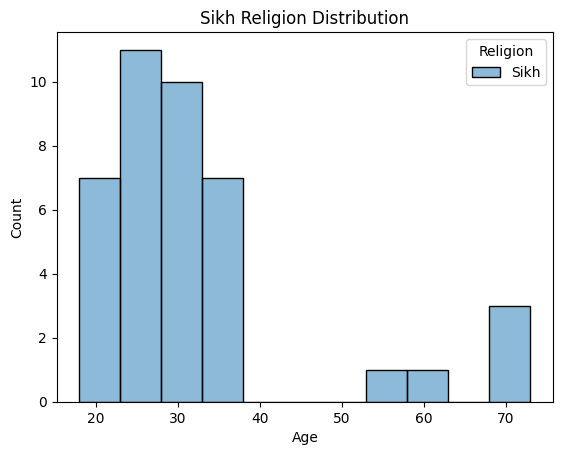

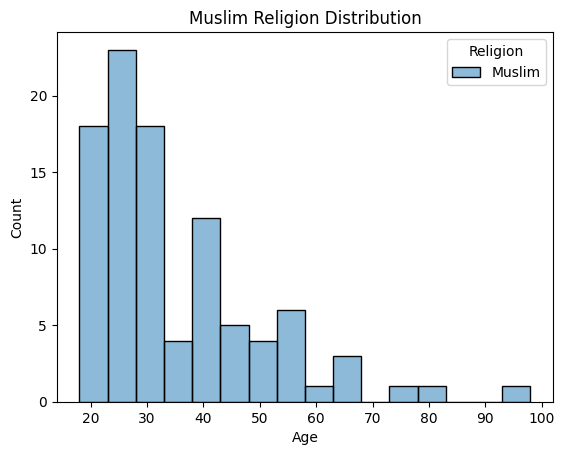

In [80]:
religions = census_data.Religion
hist = sns.histplot(x=age,  binwidth=5, color='blue')
hist.set(title='General Distribution')
plt.show()

for religion in religions.unique():
    sub_age = age[religions==religion]
    sub_rel = religions[religions==religion]
    if sub_rel.shape[0] < 20:
        continue
    # print(religion)
    hist = sns.histplot(x=sub_age, hue=sub_rel, binwidth=5)
    hist.set(title=f'{religion} Religion Distribution')
    plt.savefig(f'{religion}_distribution.png')
    plt.show()

### Divorce and Marriage Rate

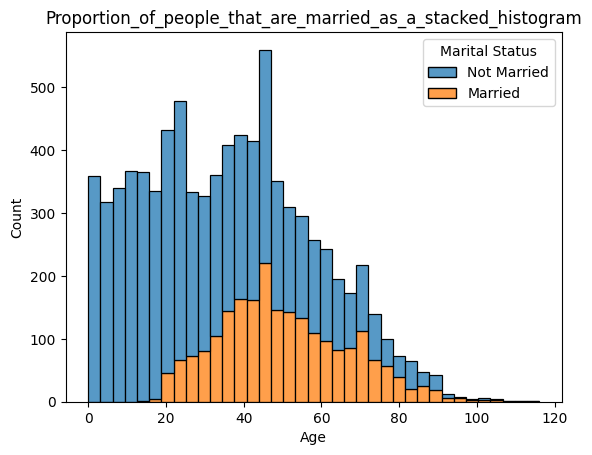

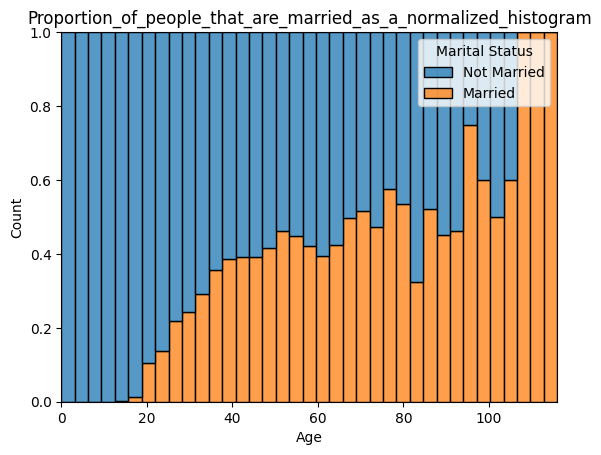

In [81]:
MaritalStatus = census_data['Marital Status'].replace(set(census_data['Marital Status'].unique()).difference({'Married'}), 'Not Married')

hist = sns.histplot(x = age, hue = MaritalStatus, multiple ='stack')
hist.set(title ='Proportion_of_people_that_are_married_as_a_stacked_histogram')
plt.show()
hist = sns.histplot(x = age, hue = MaritalStatus, multiple='fill')
hist.set(title = 'Proportion_of_people_that_are_married_as_a_normalized_histogram')
plt.show()

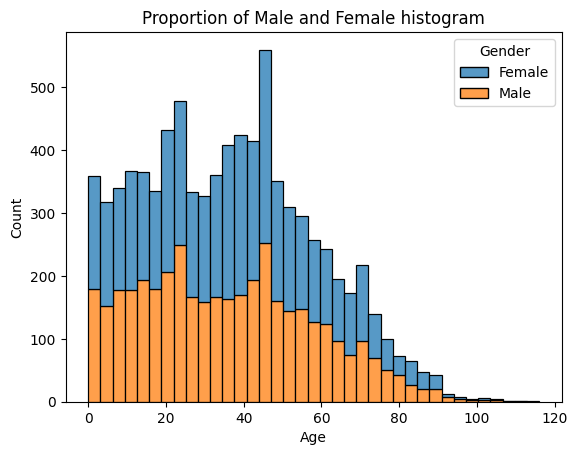

In [82]:
marital_status = census_data['Gender'].replace(set(census_data['Gender'].unique()).difference({'Male'}), 'Female')

hist=sns.histplot(x=age, hue = marital_status, multiple = 'stack')
hist.set(title='Proportion of Male and Female histogram')
plt.show()

### Occupancy 

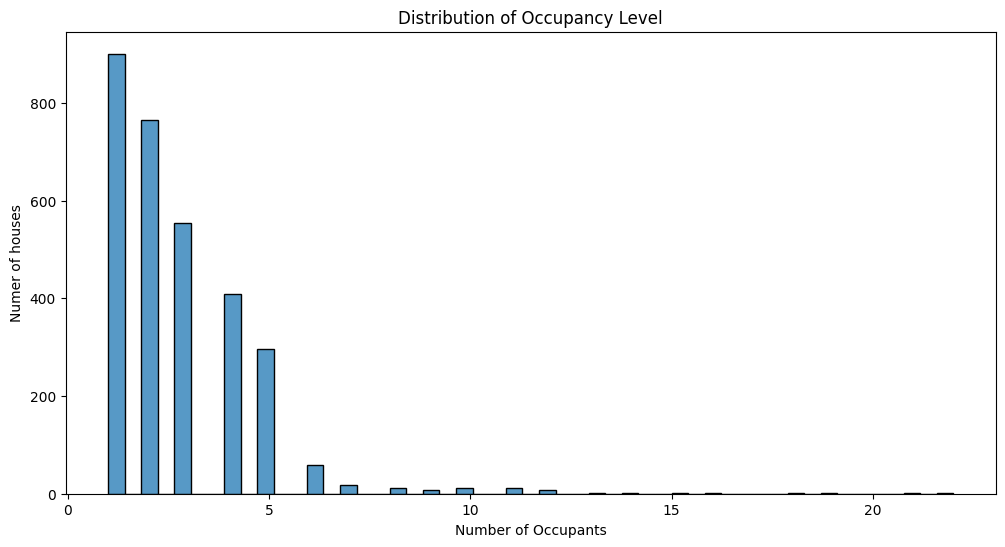

In [83]:
occup = census_data.groupby(['House Number', 'Street'])['Surname'].count()

plt.figure(figsize=(12, 6))
hist=sns.histplot(x=occup)
hist.set(title='Distribution of Occupancy Level', xlabel='Number of Occupants', ylabel='Numer of houses')
plt.show()

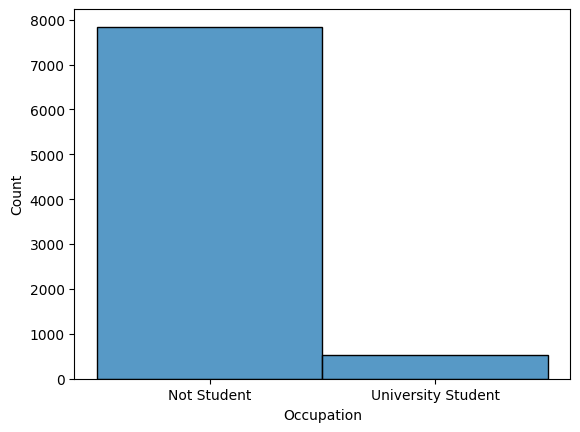

In [84]:
# Replace 'University STudent' with 'Student' and replace all other values of Occupation column with 'Not Student'
student_or_not = census_data.Occupation.replace(set(census_data.Occupation.unique()).difference({'University Student'}), 'Not Student')

hist = sns.histplot(x=student_or_not)

### Birth Rate

In [85]:
try:
    census_data[['Age']] = census_data[['Age']].apply(pd.to_numeric)
except:
    pass

children_0 = census_data['Age']
count_1 = 0
for i in children_0:
    if(i== 0):
       # print('yes')
        count_1 = count_1 + 1  
        

women = len(census_data.loc[((census_data["Age"]>=25) & (census_data["Age"]<=29))])


birth_rate = (count_1 / women) * 100000

birth_rate

15559.44055944056

### Evolving Birth Rate

In [86]:
children_4 = census_data['Age']
count_2 = 0
for i in children_4:
        if(i== 0):
           # print('yes')
            count_2 = count_2 + 1  
        

women1 = len(census_data.loc[((census_data["Age"]>30) & (census_data["Age"]<=34))])


evolving_birth_rate = (count_2 / women1) * 100000

evolving_birth_rate

18503.118503118505

## Death Rate

In [87]:
y = census_data.loc[(census_data["Age"] >= 56) & (census_data["Age"] <= 60)]
o =  census_data.loc[(census_data["Age"] >= 61) & (census_data["Age"] <= 65)]

In [88]:
y.count()

House Number                     455
Street                           455
First Name                       455
Surname                          455
Age                              455
Relationship to Head of House    455
Marital Status                   455
Gender                           455
Occupation                       455
Infirmity                        455
Religion                         455
dtype: int64

In [89]:
o.count()

House Number                     338
Street                           338
First Name                       338
Surname                          338
Age                              338
Relationship to Head of House    338
Marital Status                   338
Gender                           338
Occupation                       338
Infirmity                        338
Religion                         338
dtype: int64

In [90]:
death_rate =  len(y) - len(o)   
death_rate = death_rate/5
death_rate

23.4

### Death Rate for age group 66-71 and 70-75

In [91]:
d_rate = []

age_within_60_and_70  =  census_data.loc[((census_data["Age"]>=66) & (census_data["Age"]<=70))]
age_within_71_and_75  =  census_data.loc[((census_data["Age"]>=71) & (census_data["Age"]<=75))]

display(Markdown('**Age within 60 and 70**'))
display(age_within_60_and_70.count())
display(Markdown('**Age within 71 and 75**'))
display(age_within_71_and_75.count())
        
 
deathrate =  len(age_within_60_and_70) - len(age_within_71_and_75)   
deathrate = death_rate/5
deathrate = abs(death_rate)

d_rate.append(death_rate)


**Age within 60 and 70**

House Number                     282
Street                           282
First Name                       282
Surname                          282
Age                              282
Relationship to Head of House    282
Marital Status                   282
Gender                           282
Occupation                       282
Infirmity                        282
Religion                         282
dtype: int64

**Age within 71 and 75**

House Number                     248
Street                           248
First Name                       248
Surname                          248
Age                              248
Relationship to Head of House    248
Marital Status                   248
Gender                           248
Occupation                       248
Infirmity                        248
Religion                         248
dtype: int64

In [92]:
death_rate1 =  len(age_within_60_and_70) - len(age_within_71_and_75)   
death_rate1 = death_rate/5
death_rate1

4.68

### Death Rate for All Remaining Ages

In [93]:
age_betwn_76_and_80  =  census_data.loc[((census_data['Age'] >= 76) & (census_data['Age'] <= 80))]
age_btwn_81_and_85   =  census_data.loc[((census_data['Age'] >= 81) & (census_data['Age'] <= 85))]

display(Markdown(f'Age within (76 - 80)'))
display(len(age_betwn_76_and_80))
display(Markdown(f'Age within (81 - 85)'))
display(len(age_btwn_81_and_85))
        
death_rate =  abs(len(age_betwn_76_and_80) - len(age_btwn_81_and_85))   
death_rate = death_rate/5

display(Markdown(f'Death Rate:'),death_rate)

d_rate.append(death_rate)

display(Markdown(f'---------------------------------------------------'))



age_betwn_86_and_90    =  census_data.loc[((census_data['Age']>=86) & (census_data['Age']<=90))]
age_betwn_91_and_100      =  census_data.loc[((census_data['Age']>=91) & (census_data['Age']<=100))]

display(Markdown(f'Age Between (86 - 90)'))
display(len(age_betwn_86_and_90))
display(Markdown(f'Age Between (91 - 100)'))
display(len(age_betwn_91_and_100))
        
death_rate =  abs(len(age_betwn_86_and_90) - len(age_betwn_91_and_100))   
death_rate = death_rate/5

display(Markdown(f'Death Rate:'),death_rate)

d_rate.append(death_rate)

display(Markdown(f'---------------------------------------------------'))



age_betwn_101_and_110    =  census_data.loc[((census_data["Age"] >= 101) & (census_data['Age'] <= 110))]
age_betwn_111_and_120      =  census_data.loc[((census_data["Age"] >= 111) & (census_data['Age'] <=120))]

display(Markdown(f'Age Between (101 - 110)'))
display(len(age_betwn_101_and_110))
display(Markdown(f'Age Between (111 - 120)'))
display(len(age_betwn_111_and_120))
        
death_rate =  abs(len(age_betwn_101_and_110) - len(age_betwn_111_and_120))   
death_rate = death_rate/5

display(Markdown(f'Death Rate is '),death_rate)

d_rate.append(death_rate)


Age within (76 - 80)

146

Age within (81 - 85)

108

Death Rate:

7.6

---------------------------------------------------

Age Between (86 - 90)

72

Age Between (91 - 100)

26

Death Rate:

9.2

---------------------------------------------------

Age Between (101 - 110)

12

Age Between (111 - 120)

2

Death Rate is 

2.0

### Total Death Rate

In [94]:
display(Markdown(f'Total Death Rate is'),sum(d_rate))

Total Death Rate is

42.2

In [95]:
census_data

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Regentchain Avenue,Ashleigh,Dale,41.0,Head,Divorced,Female,Field trials officer,None,Catholic
1,1,Regentchain Avenue,Deborah,Dale,11.0,Daughter,Single,Female,Student,None,None
2,1,Regentchain Avenue,Gary,Dale,7.0,Son,Single,Male,Student,None,None
3,2,Regentchain Avenue,Edward,Grant,40.0,Head,Married,Male,Environmental education officer,None,Methodist
4,2,Regentchain Avenue,Elizabeth,Grant,35.0,Wife,Married,Female,Public librarian,None,Catholic
...,...,...,...,...,...,...,...,...,...,...,...
8372,1,Howard House,Dennis,Bryant,1.0,Son,Single,Male,Child,None,None
8373,1,Howard House,Beverley,Cox,44.0,Lodger,Single,Female,Building services engineer,None,None
8374,1,Howard House,Lee,Harrison,32.0,Lodger,Single,Male,Diplomatic Services operational officer,None,None
8375,1,Howard House,Hollie,Carroll,52.0,Lodger,Single,Female,Further education lecturer,None,Christian


### Difference of Birth Rate and Death Rate

In [96]:
bd_rate = abs(sum(d_rate) - birth_rate)
bd_rate

15517.240559440559

### 5 Immigrant and Emigrant

In [97]:
lodgers_and_visitors = census_data[(census_data['Relationship to Head of House'] == 'Lodger') | (census_data['Relationship to Head of House'] == 'Visitor')]
divorced_people = census_data[census_data['Marital Status'] == 'Divorced']

im_em_rate = ((len(lodgers_and_visitors) + len(divorced_people)) / len(census_data)) * 100000

abs(im_em_rate - bd_rate)

2469.6101428236325

### 6a Demand for New Houses

In [98]:
people_in_house = []
number_people = 0
for relat in census_data['Relationship to Head of House']:
    if relat == 'Head':
        if number_people > 0:
            people_in_house.append(number_people)
        number_people = 1
    else:
        number_people += 1

if number_people > 0:
    people_in_house.append(number_people)

average_occupancy = round(sum(people_in_house) / len(people_in_house))

In [99]:
average_occupancy

3

### 6b Difference

- Difference between average occupancy and the number of the people live in the given house.

In [100]:
diffs = [abs(people_in_house[i] - average_occupancy) for i in range(1, len(people_in_house))]
mean = round(sum(diffs) / len(diffs))
mean

1

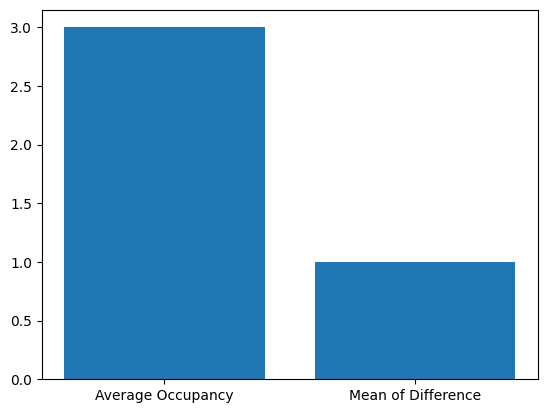

In [101]:
x   = ['Average Occupancy', 'Mean of Difference']
y   = [average_occupancy,mean]

plt.bar(x,y);

In [102]:
print('Religions :', census_data['Religion'].unique())
census_data['Religion'].describe()

Religions : ['Catholic' 'None' 'Methodist' 'Christian' 'Jewish' 'Sikh' 'Muslim'
 'Buddist' 'Quaker' 'Housekeeper' 'Jedi' 'Pagan' 'Private' 'Orthodoxy']


count     8377
unique      14
top       None
freq      4852
Name: Religion, dtype: object

### Mean Religion

In [103]:
religions = ['Christian', 'Muslim', 'Catholic', 'Methodist']
means = {}

for religion in religions:
    if religion is None:
        mask = census_data['Religion'].isnull()
    else:
        mask = census_data['Religion'] == religion
    subset = census_data.loc[mask, 'Age']
    means[religion] = round(subset.mean())

for religion, mean in means.items():
    if religion is None:
        print(f"The Mean of ages having no religion: {mean}")
    else:
        print(f"The Mean of ages having religion {religion}: {mean}")

The Mean of ages having religion Christian: 50
The Mean of ages having religion Muslim: 35
The Mean of ages having religion Catholic: 44
The Mean of ages having religion Methodist: 46


### Mode

In [104]:
religions = ['Christian', 'Muslim', 'Catholic', 'Methodist']
modes = {}

for religion in religions:
    if religion is None:
        mask = census_data['Religion'].isnull()
    else:
        mask = census_data['Religion'] == religion
    subset = census_data.loc[mask, 'Age']
    modes[religion] = round(subset.mode())

for religion, mode in modes.items():
    if religion is None:
        print(f"The Mode of ages having no religion: {mode}")
    else:
        print(f"The Mode of ages having religion {religion}: {mode}")

The Mode of ages having religion Christian: 0    51.0
Name: Age, dtype: float64
The Mode of ages having religion Muslim: 0    20.0
Name: Age, dtype: float64
The Mode of ages having religion Catholic: 0    41.0
Name: Age, dtype: float64
The Mode of ages having religion Methodist: 0    36.0
Name: Age, dtype: float64


### Median Religion

In [105]:
religions = ['Christian', 'Muslim', 'Catholic', 'Methodist']
medians = {}

for religion in religions:
    if religion is None:
        mask = census_data['Religion'].isnull()
    else:
        mask = census_data['Religion'] == religion
    subset = census_data.loc[mask, 'Age']
    medians[religion] = round(subset.median())

for religion, median in medians.items():
    if religion is None:
        print(f"The Median of ages having no religion: {median}")
    else:
        print(f"The Median of ages having religion {religion}: {median}")

The Median of ages having religion Christian: 51
The Median of ages having religion Muslim: 29
The Median of ages having religion Catholic: 42
The Median of ages having religion Methodist: 43


### Range

In [106]:
religions = ['Christian', 'Muslim', 'Catholic', 'Methodist']
ranges = {}

for religion in religions:
    if religion is None:
        mask = census_data['Religion'].isnull()
    else:
        mask = census_data['Religion'] == religion
    subset = census_data.loc[mask, 'Age'].dropna()
    ranges[religion] = round(subset.max() - subset.min())

for religion, r in ranges.items():
    if religion is None:
        print(f"The Range of ages having no religion: {r}")
    else:
        print(f"The Range of ages having religion {religion}: {r}")

The Range of ages having religion Christian: 98
The Range of ages having religion Muslim: 76
The Range of ages having religion Catholic: 84
The Range of ages having religion Methodist: 85


In [107]:
Q1 = census_data['Age'][:int(len(census_data)/2)].median()
Q3 = census_data['Age'][int(len(census_data)/2):].median() 
Q2 = census_data['Age'].median() 

IQR = abs(Q3 -Q1)

print(f'The interquartile range: ',IQR)

The interquartile range:  1.0


### Repeat the above analysis for adults who have left this box blank

In [108]:
for i in range(len(census_data["Age"])):
    try:
        census_data["Age"][i] = int(census_data["Age"][i])
        if census_data["Age"][i] > 120 or census_data["Age"][i] < 0:
            df_census2["Age"][i] = random.randint(0, 120)
    except:
        census_data["Age"][i] = random.randint(0, 120)
        
# Measures of centrality
mask = (census_data['Religion'] != 'Christian') & (census_data['Religion'] != 'Muslim') & (census_data['Religion'] != 'Catholic') & (census_data['Religion'] != 'Methodist')
g2_mean = census_data['Age'].loc[(mask)].mean()
g2_median = census_data['Age'].loc[(mask)].median()
g2_mode = census_data['Age'].loc[(mask)].mode()[0]
print('mean:', g2_mean)
print('median:', g2_median)
print('mode:', g2_mode)

# Range
g2_range = census_data['Age'].loc[(mask).dropna()].max() - census_data['Age'].loc[(mask)].min()
print('range:', g2_range)

# IQR
Q1 = census_data['Age'].loc[:int(len(census_data)/2)].median()
Q3 = census_data['Age'].loc[int(len(census_data)/2):].median()
IQR = abs(Q3 - Q1)
print('interquartile range:', IQR)    

C:\Users\Rebirthlogo\AppData\Local\Temp\ipykernel_1088\3008474203.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_data["Age"][i] = int(census_data["Age"][i])


mean: 28.595382746051033
median: 24.0
mode: 15.0
range: 107.0
interquartile range: 1.0


In [109]:
# for Christianity
muslim  = (len(census_data.loc[((census_data['Religion']=='Muslim'))]) / len(census_data)) * 100
christian  = (len(census_data.loc[((census_data['Religion']=='Christian'))]) / len(census_data))  * 100
catholic  = (len(census_data.loc[((census_data['Religion']=='Catholic'))]) / len(census_data)) * 100
methodist  = (len(census_data.loc[((census_data['Religion']=='Methodist'))]) / len(census_data)) * 100

In [110]:
# precentage probability for religion
print('for Muslim : ',muslim)
print('for Christian : ',christian)
print('for Catholic : ',catholic)
print('for Methodist : ',methodist)

for Muslim :  1.157932434045601
for Christian :  23.349647845290676
for Catholic :  10.576578727468068
for Methodist :  5.968723886832995


In [111]:
!pip install scipy


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [112]:
# Determine if there is a significant association between Religion and Marital Status
import scipy.stats as stats
rel_mar = pd.crosstab(census_data['Religion'], census_data['Marital Status'])
chi2, p, dof, expected = stats.chi2_contingency(rel_mar)
print('Chi-squared test statistic:', chi2)
print('P-value:', p)

Chi-squared test statistic: 523.8912874827386
P-value: 3.665836242710236e-86


- The chi-squared test statistic of 523.8912874827386 indicates that there is a significant difference between the observed frequencies and the expected frequencies in the contingency table, which suggests that there may be an association between the two categorical variables being analyzed.

- The p-value of 3.665836242710236e-86 is less than the significance level of 0.05, indicating strong evidence against the null hypothesis of independence between the two variables. Therefore, we can reject the null hypothesis and conclude that there is a significant association between the two variables.
- This means that the two variables being analyzed are likely not independent and may be associated with each other.

In [113]:
# Determine if there is a significant association between Religion and Gender
rel_gen = pd.crosstab(census_data['Religion'], census_data['Gender'])
chi2, p, dof, expected = stats.chi2_contingency(rel_gen)
print('Chi-squared test statistic:', chi2)
print('P-value:', p)

Chi-squared test statistic: 32.705211755830064
P-value: 0.0018864021082246913


- The chi-squared test statistic of 32.705211755830064 indicates that there is a significant difference between the observed frequencies and the expected frequencies in the contingency table, which suggests that there may be an association between the two categorical variables being analyzed.

- The p-value of 0.0018864021082246913 is less than the significance level of 0.05, indicating strong evidence against the null hypothesis of independence between the two variables. Therefore, we can reject the null hypothesis and conclude that there is a significant association between the two variables.

- In practical terms, this means that the two variables being analyzed are likely not independent and may be associated with each other.

In [114]:
# Determine if there is a significant association between Gender and Occupation
rel_occ = pd.crosstab(census_data['Gender'], census_data['Occupation'])
chi2, p, dof, expected = stats.chi2_contingency(rel_occ)
print('Chi-squared test statistic:', chi2)
print('P-value:', p)

Chi-squared test statistic: 708.1850021832216
P-value: 0.04242064100414571


- The chi-squared test statistic is a measure of how much the observed frequencies in a data set deviate from the expected frequencies under a null hypothesis. In this case, the chi-squared test statistic is 708.185 and the p-value is 0.0424.

- The p-value is the probability of obtaining a chi-squared test statistic as extreme or more extreme than the observed value, assuming the null hypothesis is true.

- With a p-value of 0.0424, we can reject the null hypothesis at the 5% significance level, meaning there is evidence to suggest that there is a statistically significant association between the variables being tested. However, it is important to note that the significance level is arbitrary and should be chosen based on the context of the analysis and the consequences of a Type I error.